Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     시즌    팀    RTG  Rushing_YDS  Receiving_YDS   TOT  INT  TD  PTS  Win
0  2023  Buf   92.2         2212           4306  1124   18  54  451    0
1  2022  Buf   95.8         2232           4291  1128   17  53  455    0
2  2021  Buf   91.3         2209           4450  1110   19  57  483    0
3  2020  Buf  107.6         1723           4786  1045   15  60  501    0
4  2019  Buf   82.8         2054           3476  1032   14  35  314    0
Epoch 1/100
4/4 [==============================] - 3s 152ms/step - loss: 0.7884 - accuracy: 0.1569 - val_loss: 0.6753 - val_accuracy: 0.6154
Epoch 2/100
4/4 [==============================] - 0s 28ms/step - loss: 0.6715 - accuracy: 0.6471 - val_loss: 0.6186 - val_accuracy: 0.9231
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.5881 - accuracy: 0.9412 - val_loss: 0.5678 - val_accuracy: 0.9231
Epoch 4/100


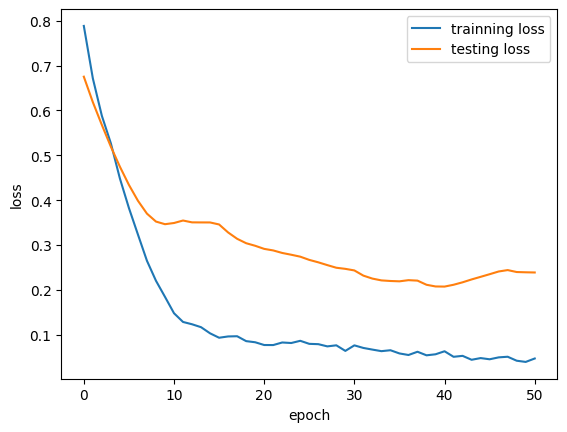

1/1 [==============================] - 0s 92ms/step - loss: 0.2112 - accuracy: 0.9688
Test Accuracy: 96.88%
1/1 [==============================] - 0s 76ms/step
    Win_Probability    팀    시즌
0      9.345939e-03  Buf  2023
1      2.260209e-02  Mia  2023
2      7.821151e-07   NE  2023
3      1.543896e-06  NYJ  2023
4      1.035806e-03  Bal  2023
5      3.385784e-02  Cin  2023
6      9.554469e-04  Cle  2023
7      3.815877e-04  Pit  2023
8      3.443868e-02  Hou  2023
9      8.495769e-03  Ind  2023
10     3.698504e-02  Jax  2023
11     2.175330e-05  Ten  2023
12     5.409927e-03  Den  2023
13     1.841105e-03   KC  2023
14     2.436370e-04   LV  2023
15     1.583373e-03  LAC  2023
16     6.295830e-02  Dal  2023
17     8.110775e-05  NYG  2023
18     4.080766e-02  Phi  2023
19     2.568119e-04  WSH  2023
20     1.258548e-04  Chi  2023
21     1.585625e-02  Det  2023
22     1.793334e-02   GB  2023
23     5.121566e-03  Min  2023
24     1.286700e-04  Atl  2023
25     2.337810e-07  Car  2023
26 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nfl stats/NFL team stats.csv')

# Display the first few rows of the dataframe
print(df.head())

# Select relevant columns
features = ['RTG', 'Rushing_YDS', 'Receiving_YDS', 'TOT', 'INT', 'TD', 'PTS']
target = 'Win'
df = df.dropna(subset=features + [target])

# Split the dataset by season
train_df = df[df['시즌'] < 2023]
test_df = df[df['시즌'] == 2023]

# Split into features and target
X_train = train_df[features].values
y_train = train_df[target].values
X_test = test_df[features].values
y_test = test_df[target].values

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for probability output

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train the model
#history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 훈련 손실과 검증 손실을 에포크에 따라 그래프로 나타내기
plt.plot(history.history['loss'], label='trainning loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to win probabilities
team_win_probabilities = pd.DataFrame(predictions, columns=['Win_Probability'])
team_win_probabilities['팀'] = test_df['팀'].values
team_win_probabilities['시즌'] = test_df['시즌'].values

# Display team win probabilities for the 2023 season
print(team_win_probabilities)
